# Molecular Docking using AutoDock VINA

The aim of these exercises is to familiarise with tools to perform the target or blid docking of small molecules onto protein targets. The reference theory is that of Lecture 8:

*   https://github.com/carlocamilloni/Structural-Bioinformatics/blob/main/Notes/08_StructurePredictionDocking.pdf

## Introduction

**Molecular docking simulations** explore the potential binding poses of small molecules on the **binding site** of a target protein for which an experimentally determined or predicted structure is available.

Thus, the **_druggability_** of different compounds and their binding affinity on a given protein target can be calculated for further lead optimization processes.

<figure>
<center>
<img src='https://raw.githubusercontent.com/pb3lab/ibm3202/master/images/docking_01.png'/>
<figcaption>FIGURE 1. In molecular docking, binding is evaluated in two steps: A) Energetics of the transition of the unbound states of ligand and target towards the conformations of the bound complex; and B) energetics of protein-ligand binding in these conformations. <br> Huey R et al (2007) <i>J Comput Chem 28(6), 1145-1152.</i></figcaption></center>
</figure>

Molecular docking programs perform a **search algorithm** in which varying conformations of a given ligand, typically generated using Monte Carlo or Genetic algorithms, are recursively evaluated until convergence to an energy minimum is reached. Finally, through an **affinity scoring function**, a ΔG [binding free energy in kcal/mol] is estimated and employed to rank the candidate poses as the sum of several energetic contributions (electrostatics, van der Waals, desolvation, etc).

###Experimental Overview

In this task you will perfom a docking assay of **indinavir**, an active component of the **antiretroviral therapy to treat HIV**, onto the binding site of its target protein, **HIV-2 protease**.

For our laboratory session, we will install and use **MGLtools** (and alternatively **pdb2pqr**) to prepare the target protein files, **OpenBabel** to prepare the ligand files, **AutoDock Vina** for the docking procedure and **py3Dmol** to establish the appropriate search grid configuration and analyze the results.

<figure>
<center>
<img src='https://raw.githubusercontent.com/pb3lab/ibm3202/master/images/docking_02.png' />
<figcaption>FIGURE 2. General steps of molecular docking. First, the target protein and ligand or ligands are parameterized. Then, the system is prepared by setting up the search grid. Once the docking calculation is performed, ligand poses are scored based on a given energy function. Lastly, the computational search is processed and compared against experimental data for validation <br><i>Taken from Pars Silico (en.parssilico.com).</i></figcaption></center>
</figure>

## Part 0 – Downloading and Installing the required software

Before we start, you must first **remember to start the hosted runtime in Google Colab**.

Then, we must install several pieces of software to perform this tutorial. Namely:
- **py3Dmol** for visualization of the protein structure and setting up the search grid.
- **miniconda**, a free minimal installer of **conda** for software package and environment management.
- **OpenBabel** for parameterization of our ligand(s).
- **MGLtools** for parameterization of our target protein using Gasteiger charges.
- **pdb2pqr** for parameterization of our protein using the AMBER ff99 forcefield.
- **Autodock Vina** for the docking process

**WARNING** run the next cell and wait for it to finish before going to next

In [ ]:
#Install conda using the new conda-colab library
!pip install -q condacolab
import condacolab
condacolab.install()

Traceback (most recent call last):
  File "/usr/local/bin/pip", line 7, in <module>
    from pip import main
ImportError: No module named pip
✨🍰✨ Everything looks OK!


**WARNING** run the above cell and wait for it to finish before going to next

In [ ]:
!pip install -q pdb2pqr

Traceback (most recent call last):
  File "/usr/local/bin/pip", line 7, in <module>
    from pip import main
ImportError: No module named pip


In [ ]:
#Install MGLtools and OpenBabel from the bioconda repository
#!conda install -q -c conda-forge rdkit zlib --yes
!conda install -q -c bioconda mgltools openbabel

Traceback (most recent call last):
  File "/usr/local/bin/conda", line 12, in <module>
    from conda.cli import main
ImportError: No module named conda.cli


Make a Task8 folder for the task in you google drive and copy  the notebook there. Then mount google drive on Colab

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Set your working path

In [ ]:
local_path='/content/drive/MyDrive/Colab_Docking/EXP1/'   # PASTE YOUR LOCAL PATH IN PLACE OF /content
%cd {local_path}

/content/drive/MyDrive/Colab_Docking/EXP1


In [ ]:
#Checking that pdb2pqr was properly installed
!pdb2pqr -h

usage: pdb2pqr [-h] [--ff {AMBER,CHARMM,PARSE,TYL06,PEOEPB,SWANSON}]
               [--userff USERFF] [--clean] [--nodebump] [--noopt]
               [--keep-chain] [--assign-only]
               [--ffout {AMBER,CHARMM,PARSE,TYL06,PEOEPB,SWANSON}]
               [--usernames USERNAMES] [--apbs-input APBS_INPUT]
               [--pdb-output PDB_OUTPUT] [--ligand LIGAND] [--whitespace]
               [--neutraln] [--neutralc] [--drop-water] [--include-header]
               [--titration-state-method {propka}] [--with-ph PH]
               [-f FILENAMES] [-r REFERENCE] [-c CHAINS] [-i TITRATE_ONLY]
               [-t THERMOPHILES] [-a ALIGNMENT] [-m MUTATIONS] [-p PARAMETERS]
               [--log-level {DEBUG,INFO,WARNING,ERROR,CRITICAL}] [-o PH]
               [-w WINDOW WINDOW WINDOW] [-g GRID GRID GRID]
               [--mutator MUTATOR] [--mutator-option MUTATOR_OPTIONS] [-d]
               [-l] [-k] [-q] [--protonate-all] [--version]
               input_path output_pqr

PDB2PQR v3.

3. Finally, we will download the Autodock Vina program from the Scripps website and make an alias to use it during this session

In [ ]:
%cd {local_path}
#Download and extract Autodock Vina from SCRIPPS
#Then, we set up an alias for vina to be treated as a native binary
!wget --no-check-certificate --no-clobber https://github.com/ccsb-scripps/AutoDock-Vina/releases/download/v1.2.7/vina_1.2.7_linux_x86_64
!chmod +x vina_1.2.7_linux_x86_64

/content/drive/MyDrive/Colab_Docking/EXP1
File ‘vina_1.2.7_linux_x86_64’ already there; not retrieving.



In [ ]:
%alias vina '{local_path}'/vina_1.2.7_linux_x86_64

Once these software installation processes are completed, we are ready to perform our experiments

## Part 1 – Downloading and Preparing the Receptor for AutoDock Vina

1. The first step in a molecular docking procedure is to have a structure of a given target protein. While in some cases a high-quality comparative model will be used, most cases start with an experimentally (X-ray, NMR, cryoEM) solved three-dimensional structure.

  In such cases, a given target protein structure is downloaded from the **Protein Data Bank (PDB)** (https://www.rcsb.org/pdb) using a given accession ID. For example, the PET hydrolase solved by our lab has the accession ID 6ANE.

  For this tutorial, we will use the structure of the HIV-2 protease, solved using X-ray crystallography and deposited in the PDB with the accession ID 1HSG. We can directly download this structure from the PDB using *wget* and extracting it using *gzip*:

In [ ]:
#Download a protein structure from PDB using and extract it
pdb_ids = ['1QQW', '2F9Q', '2JLP', '3CYN', '5FIW']

for pdb_id in pdb_ids:
    print(f"Downloading and extracting {pdb_id}.pdb.gz")
    # Using https directly and -L to follow redirects
    !wget -L https://www.rcsb.org/pdb/files/{pdb_id}.pdb.gz
    !gzip -d -f {pdb_id}.pdb.gz

--2026-02-12 08:59:26--  https://www.rcsb.org/pdb/files/1QQW.pdb.gz
Resolving www.rcsb.org (www.rcsb.org)... 128.6.158.50, 128.6.158.51
Connecting to www.rcsb.org (www.rcsb.org)|128.6.158.50|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://files.rcsb.org/download/1QQW.pdb.gz [following]
--2026-02-12 08:59:26--  https://files.rcsb.org/download/1QQW.pdb.gz
Resolving files.rcsb.org (files.rcsb.org)... 143.204.204.2, 143.204.204.62, 143.204.204.101, ...
Connecting to files.rcsb.org (files.rcsb.org)|143.204.204.2|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/gzip]
Saving to: ‘1QQW.pdb.gz’

1QQW.pdb.gz             [ <=>                ] 322.08K  --.-KB/s    in 0.07s   

2026-02-12 08:59:26 (4.67 MB/s) - ‘1QQW.pdb.gz’ saved [329812]

--2026-02-12 08:59:26--  https://www.rcsb.org/pdb/files/2F9Q.pdb.gz
Resolving www.rcsb.org (www.rcsb.org)... 128.6.158.50, 128.6.158.51
Connecting to www.rcsb.o

2. In the case of X-ray diffraction, this experimental strategy does not discriminate between electron density coming from static protein atoms or water molecules, meaning that most protein structures solved by X-ray diffraction also include so-called **crystallographic waters** (check the non-bonded red dots on the protein structure below). These molecules are not important for our particular docking simulation, and we also have to remove them.
<figure>
<center>
<img src='https://raw.githubusercontent.com/pb3lab/ibm3202/master/images/docking_03.png' />
<figcaption>FIGURE 3. Cartoon representation of HIV-2 protease dimer (PDB accession ID 1HSG), with its N-to-C-terminal residues colored from blue to red in rainbow spectrum, showing the crystallographic waters as red spheres.</i></figcaption></center>
</figure>

  Typically, this can be easily done by extracting all of the lines from the PDB file that start with **"ATOM"**, as this is how all of the atoms that belong to amino and nucleic acid residues are termed. In contrasts, the atoms from ligands, water molecules and other non-protein/non-nucleic residues are commonly referred to as **"HETATM"**. Also, the different chains of an oligomer are separated by a **"TER"** string, which is important to keep in our case.

  The following **python script** will first create a folder in which we will store all data related to our molecular docking experiment. Then, it will extract all lines matching the string "ATOM" (for the protein atoms) or "TER" (for the chain separations) into a separate PDB file for further processing. Please take a good look at it.

In [ ]:
#This script will create a folder for each protein based on its PDB ID
#Then, it will print all "ATOM" and "TER" lines from a given PDB into a new file within that folder

#Let's make a folder first. We need to import the os and path library
import os
from pathlib import Path

# Define the list of PDB IDs to process
pdb_ids = ['1QQW', '2F9Q', '2JLP', '3CYN', '5FIW']

# Assuming local_path is correctly set by a previous cell, e.g., to /content/drive/MyDrive/Colab_Docking/EXP1/
# We need to make sure local_path is defined if this cell is run independently.
if 'local_path' not in locals():
    local_path = '/content/drive/MyDrive/Colab_Docking/EXP1/' # Fallback or ensure it's loaded from previous cells

for pdb_id in pdb_ids:
  # Define the path of the subdirectory for each PDB
  singlepath = Path(f"{local_path}{pdb_id}")

  # Create the subdirectory if it doesn't exist
  if os.path.exists(singlepath):
    print(f"Path {singlepath} already exists")
  if not os.path.exists(singlepath):
    os.mkdir(singlepath)
    print(f"Path {singlepath} was successfully created")

  # The original PDB files are downloaded by wget into the local_path (current working directory)
  downloaded_pdb_path = Path(f"{local_path}{pdb_id}.pdb") # Corrected path to local_path

  # And we use the following script to selectively print the lines that contain the
  # string "ATOM" and "TER" into a new file inside our recently created folder
  output_prot_file = singlepath / f"{pdb_id}_prot.pdb"
  with open(output_prot_file,"w") as g:
    f = open(downloaded_pdb_path,'r') # Read from where wget actually put the file
    for line in f:
      row = line.split()
      if row and row[0] == "ATOM": # Check if row is not empty before accessing index 0
        g.write(line)
      elif row and row[0] == "TER": # Check if row is not empty before accessing index 0
        g.write("TER\n")
    g.write("END")
    print(f"File {output_prot_file} successfully created")

  # Move the original downloaded PDB file into its dedicated subdirectory
  destination_original_pdb = singlepath / f"{pdb_id}.pdb"
  if os.path.exists(downloaded_pdb_path):
      !mv {downloaded_pdb_path} {destination_original_pdb}
      print(f"Moved original {pdb_id}.pdb from {local_path} to {destination_original_pdb}")
  else:
      print(f"Original PDB file {downloaded_pdb_path} not found for moving.")

Path /content/drive/MyDrive/Colab_Docking/EXP1/1QQW already exists
File /content/drive/MyDrive/Colab_Docking/EXP1/1QQW/1QQW_prot.pdb successfully created
Moved original 1QQW.pdb from /content/drive/MyDrive/Colab_Docking/EXP1/ to /content/drive/MyDrive/Colab_Docking/EXP1/1QQW/1QQW.pdb
Path /content/drive/MyDrive/Colab_Docking/EXP1/2F9Q already exists
File /content/drive/MyDrive/Colab_Docking/EXP1/2F9Q/2F9Q_prot.pdb successfully created
Moved original 2F9Q.pdb from /content/drive/MyDrive/Colab_Docking/EXP1/ to /content/drive/MyDrive/Colab_Docking/EXP1/2F9Q/2F9Q.pdb
Path /content/drive/MyDrive/Colab_Docking/EXP1/2JLP already exists
File /content/drive/MyDrive/Colab_Docking/EXP1/2JLP/2JLP_prot.pdb successfully created
Moved original 2JLP.pdb from /content/drive/MyDrive/Colab_Docking/EXP1/ to /content/drive/MyDrive/Colab_Docking/EXP1/2JLP/2JLP.pdb
Path /content/drive/MyDrive/Colab_Docking/EXP1/3CYN already exists
File /content/drive/MyDrive/Colab_Docking/EXP1/3CYN/3CYN_prot.pdb successfully

3. Once we printed out the "ATOM" lines of the parent PDB file, we have a new file that contains  the coordinates of our protein target.

  However, for AutoDock to perform a molecular docking experiment, the protein target must contain information about the partial charges of each atom and atom types that are compatible with AutoDock. Such format is referred to as **PDBQT**, a modification of the PDB format that also includes **charges (q)** and **AutoDock-specific atom types (t)** in two extra columns at the end of the now PDBQT file.

  Lastly, the protein target must contain **all polar hydrogens**. Most protein structures have no hydrogens included, meaning that we must add them.

  This is the part of the tutorial where you have **two different options** to proceed with your experiment!

3. a) Add the polar hydrogens of your protein and parameterize it with **Gasteiger** charges and atom types using **MGLtools** (this is the canonical option for the majority of AutoDock users)

In [ ]:
#Parameterizing and adding Gasteiger charges into our protein using MGLtools

pdb_ids = ['1QQW', '2F9Q', '2JLP', '3CYN', '5FIW']

# Ensure local_path is defined, as it's used to construct the absolute paths
if 'local_path' not in locals():
    local_path = '/content/drive/MyDrive/Colab_Docking/EXP1/' # Fallback or ensure it's loaded from previous cells

for pdb_id in pdb_ids:
    # Construct the full absolute path to the PDB-specific directory and the _prot.pdb file
    pdb_dir_path = Path(f"{local_path}{pdb_id}")
    input_pdb = pdb_dir_path / f"{pdb_id}_prot.pdb"
    output_pdbqt = pdb_dir_path / f"{pdb_id}_prot.pdbqt"
    print(f"Processing {pdb_id} using MGLtools...")
    !prepare_receptor4.py -r {input_pdb} -o {output_pdbqt} -A hydrogens -U nphs_lps -v

Processing 1QQW using MGLtools...
set verbose to  True
read  /content/drive/MyDrive/Colab_Docking/EXP1/1QQW/1QQW_prot.pdb
setting up RPO with mode= automatic and outputfilename=  /content/drive/MyDrive/Colab_Docking/EXP1/1QQW/1QQW_prot.pdbqt
charges_to_add= gasteiger
delete_single_nonstd_residues= None
adding gasteiger charges to peptide
Processing 2F9Q using MGLtools...
set verbose to  True
read  /content/drive/MyDrive/Colab_Docking/EXP1/2F9Q/2F9Q_prot.pdb
setting up RPO with mode= automatic and outputfilename=  /content/drive/MyDrive/Colab_Docking/EXP1/2F9Q/2F9Q_prot.pdbqt
charges_to_add= gasteiger
delete_single_nonstd_residues= None
adding gasteiger charges to peptide
Processing 2JLP using MGLtools...
set verbose to  True
read  /content/drive/MyDrive/Colab_Docking/EXP1/2JLP/2JLP_prot.pdb
WARNING! 2JLP_prot has 250  alternate location atoms!
Use prepare_pdb_split_alt_confs.py to create pdb files containing a single conformation.

setting up RPO with mode= automatic and outputfilename

3. b) Add the polar hydrogens of your protein and parameterize it based on the pKa of each aminoacid at pH 7.4 with the **AMBER99ff** force field using **pdb2pqr**, followed by deletion of non-polar hydrogens and conversion into **PDBQT** file using **MGLtools**.

  In this case, pdb2pqr generates an intermediate **PQR** file, a modification of the PDB format which allows users to add charge and radius parameters to existing PDB data. This information is then unaltered during the use of **MGLtools**.

In [ ]:
import os
from pathlib import Path

# Define the list of PDB IDs to process. This list is available from previous cells.
pdb_ids = ['1HSG', '1QQW', '2F9Q', '2JLP', '3CYN', '5FIW']

# Ensure local_path is defined from previous cells.
if 'local_path' not in locals():
    local_path = '/content/drive/MyDrive/Colab_Docking/EXP1/'

print(f"Starting to process PDB files in: {local_path}")

for pdb_id in pdb_ids:
    pdb_dir = Path(f"{local_path}{pdb_id}")
    input_pdb = pdb_dir / f"{pdb_id}_prot.pdb"
    output_pqr = pdb_dir / f"{pdb_id}_prot.pqr"
    output_pdbqt = pdb_dir / f"{pdb_id}_prot.pdbqt"

    print(f"\n--- Processing {pdb_id} ---")

    # Step 1: Use pdb2pqr to parameterize the receptor with AMBER99ff,
    # maintain chain IDs, and set pH to 7.4.
    print(f"Running pdb2pqr for {pdb_id}...")
    # Check if input PDB file exists
    if not input_pdb.exists():
        print(f"Error: Input PDB file {input_pdb} not found. Skipping pdb2pqr.")
        continue
    !pdb2pqr --ff=AMBER --keep-chain --with-ph=7.4 {input_pdb} {output_pqr}

    # Check if PQR file was created successfully before proceeding
    if not output_pqr.exists():
        print(f"Error: PQR file not created for {pdb_id}. Skipping prepare_receptor4.py.")
        continue

    # Step 2: Convert the .pqr file into a .pdbqt file using MGLtools.
    # Delete non-polar hydrogens but preserve AMBER parameters (-C).
    print(f"Running prepare_receptor4.py for {pdb_id}...")
    !prepare_receptor4.py -r {output_pqr} -o {output_pdbqt} -C -U nphs_lps -v

    if output_pdbqt.exists():
        print(f"Successfully created {output_pdbqt}")
    else:
        print(f"Error: PDBQT file not created for {pdb_id}.")

print("\nAll specified PDB files processed.")

Starting to process PDB files in: /content/drive/MyDrive/Colab_Docking/EXP1/

--- Processing 1HSG ---
Running pdb2pqr for 1HSG...
Error: Input PDB file /content/drive/MyDrive/Colab_Docking/EXP1/1HSG/1HSG_prot.pdb not found. Skipping pdb2pqr.

--- Processing 1QQW ---
Running pdb2pqr for 1QQW...
INFO:PDB2PQR v3.7.1: biomolecular structure conversion software.
INFO:Please cite:  Jurrus E, et al.  Improvements to the APBS biomolecular solvation software suite.  Protein Sci 27 112-128 (2018).
INFO:Please cite:  Dolinsky TJ, et al.  PDB2PQR: expanding and upgrading automated preparation of biomolecular structures for molecular simulations. Nucleic Acids Res 35 W522-W525 (2007).
INFO:Checking and transforming input arguments.
INFO:Loading topology files.
INFO:Loading molecule: /content/drive/MyDrive/Colab_Docking/EXP1/1QQW/1QQW_prot.pdb
INFO:Setting up molecule.
INFO:Created biomolecule object with 1997 residues and 16053 atoms.
INFO:Setting termini states for biomolecule chains.
INFO:Loading

**You are all set with your target protein!**

>Before we move onto preparing the ligand for molecular docking, please consider the following questions:
- Why is it important to add hydrogens for the purposes of our docking simulations?
- Why are we only adding polar hydrogens?
- Do you believe that using different force fields could have an effect on your docking results? (this is something you can actually test!)



## Part 2 – Downloading and Preparing the Ligand for AutoDock Vina

1. We now need to prepare the ligand that we will use for our docking analysis. In our case, we will use **Indinavir**. This drug is a protease inhibitor used as a component of the antiretroviral therapy to treat HIV/AIDS, aiding in decreasing the viral load. In this opportunity, we will attempt to predict the docking pose of indinavir onto the binding site of the HIV-2 protease.

  We will first start by creating a folder in which we will store our ligands for molecular docking.

In [ ]:
%cd {local_path}
#Let's make a folder first. We need to import the os and path library
import os
from pathlib import Path

#We will first create a path for all ligands that we will use in this tutorial
#Notice that the HOME folder for a hosted runtime in colab is /content/
ligandpath = Path("ligands/")

#Now, we create the folder using the os.mkdir() command
#The if conditional is just to check whether the folder already exists
#In which case, python returns an error
if os.path.exists(ligandpath):
  print("ligand path already exists")
if not os.path.exists(ligandpath):
  os.mkdir(ligandpath)
  print("ligand path was succesfully created")

/content/drive/MyDrive/Colab_Docking/EXP1
ligand path already exists


2. Now, we will download indinavir from the **DrugBank** database (*Nucleic Acids Res
. 2006; 34, D668-72*). This is comprehensive, freely accessible, online database containing information on drugs and drug targets. You can actually check the detailed chemical, pharmacological and pharmaceutical information on Indinavir [in this DrugBank link](https://www.drugbank.ca/drugs/DB00224).

  We will download this ligand in SMILES format to continue with its preparation for molecular docking



In [ ]:
# Define the PubChem CIDs for the ligands
pubchem_cids = ['5362440','146026628', '14985', '54670067']

# Ensure the ligandpath is defined (it should be from a previous cell LX_ojmvdBTd4)
if 'ligandpath' not in locals():
    from pathlib import Path
    ligandpath = Path('ligands/')

for cid in pubchem_cids:
    print(f"Downloading SMILES for PubChem CID: {cid}")
    output_filename = ligandpath / f"{cid}.smiles"
    # Construct the PubChem PUG REST URL for CanonicalSMILES
    pubchem_url = f"https://pubchem.ncbi.nlm.nih.gov/rest/pug/compound/cid/{cid}/property/CanonicalSMILES/TXT"
    !wget {pubchem_url} -O {output_filename}

--2026-02-12 09:02:02--  https://pubchem.ncbi.nlm.nih.gov/rest/pug/compound/cid/5362440/property/CanonicalSMILES/TXT
Resolving pubchem.ncbi.nlm.nih.gov (pubchem.ncbi.nlm.nih.gov)... 130.14.29.110, 2607:f220:41e:4290::110
Connecting to pubchem.ncbi.nlm.nih.gov (pubchem.ncbi.nlm.nih.gov)|130.14.29.110|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/plain]
Saving to: ‘ligands/5362440.smiles’

ligands/5362440.smi     [ <=>                ]      83  --.-KB/s    in 0s      

2026-02-12 09:02:04 (13.5 MB/s) - ‘ligands/5362440.smiles’ saved [83]

--2026-02-12 09:02:04--  https://pubchem.ncbi.nlm.nih.gov/rest/pug/compound/cid/146026628/property/CanonicalSMILES/TXT
Resolving pubchem.ncbi.nlm.nih.gov (pubchem.ncbi.nlm.nih.gov)... 130.14.29.110, 2607:f220:41e:4290::110
Connecting to pubchem.ncbi.nlm.nih.gov (pubchem.ncbi.nlm.nih.gov)|130.14.29.110|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/plain]
Saving to

3. Hey! But what is a SMILES format? Well, the **Simplified Molecular-Input Line-Entry System** (SMILES) is a text notation that allows a user to represent a chemical structure in a way that can be used by the computer. The elemental notation for different types of bonds between different atoms is as follows:

  \-	for single bonds (eg. C-C or CC is CH3CH3)

  \=	for double bonds (eg. C=C for CH2CH2)

  \#	for triple bonds (eg. C#N for C≡N)

  \	for aromatic bond (eg. C\*1\*C\*C\*C\*C\*C1 or c1ccccc1 for benzene)

  \. for disconnected structures (eg. Na.Cl for NaCl)

  / and \ for double bond stereoisomers (eg. F/C=C/F for trans-1,2-difluoroethylene and F/C=C\F for cis-1,2-difluoroethylene)

  @ and @@ for enantiomers (eg. N\[C@@H](C)C(=O)O for L-alanine and N\[C@H](C)C(=O)O for D-alanine)

  **Let's take a look at the SMILES of Indinavir!**

In [ ]:
#Print the SMILES of indinavir to see what it is all about
print((ligandpath / "5362440.smiles").read_text())
print((ligandpath / "146026628.smiles").read_text())
print((ligandpath / "14985.smiles").read_text())
print((ligandpath / "54670067.smiles").read_text())

CC(C)(C)NC(=O)C1CN(CCN1CC(CC(CC2=CC=CC=C2)C(=O)NC3C(CC4=CC=CC=C34)O)O)CC5=CN=CC=C5

CC1=C2C(=CC(=C1C(=O)O)O)C(=O)C3=C(C2=O)C(=CC(=C3)O)[O-]

CC1=C(C2=C(CCC(O2)(C)CCCC(C)CCCC(C)CCCC(C)C)C(=C1O)C)C

C(C(C1C(=C(C(=O)O1)O)O)O)O



In [ ]:
import sys
!{sys.executable} -m pip install py3Dmol kora rdkit biopandas

In [ ]:
#Use the following viewer to load your SMILES as a 3D molecule
import py3Dmol
import kora.install.rdkit
from rdkit import Chem
from rdkit.Chem import AllChem

def MolTo3DView(mol, size=(300, 300), style="stick", surface=False, opacity=0.5):
    assert style in ('line', 'stick', 'sphere', 'carton')
    mblock = Chem.MolToMolBlock(mol)
    viewer = py3Dmol.view()
    viewer.addModel(mblock, 'mol')
    viewer.setStyle({style:{}})
    if surface:
        viewer.addSurface(py3Dmol.SAS, {'opacity': opacity})
    viewer.zoomTo()
    return viewer

from ipywidgets import interact,fixed,IntSlider
import ipywidgets

def smi2conf(smiles):
    '''Convert SMILES to rdkit.Mol with 3D coordinates'''
    mol = Chem.MolFromSmiles(smiles)
    if mol is not None:
        mol = Chem.AddHs(mol)
        AllChem.EmbedMolecule(mol)
        AllChem.MMFFOptimizeMolecule(mol, maxIters=200)
        return mol
    else:
        return None

@interact
def smi2viewer(cc='PASTE HERE YOUR SMILE'):
    try:
        conf = smi2conf(cc)
        return MolTo3DView(conf).show()
    except:
        return None

interactive(children=(Text(value='PASTE HERE YOUR SMILE', description='cc'), Output()), _dom_classes=('widget-…

4. Now, we will take this SMILES format and use it to construct and parameterize a three-dimensional structure of Indinavir in **PDBQT** format for its use in molecular docking. As with the receptor, we also have different options to prepare our ligand for molecular docking:

4. a) Use the program **babel** to convert the SMILES into a **MOL2** file without any extra work (such as searching for best conformers) except for setting the protonation state to pH 7.4, and then use **MGLtools** to parameterize the ligand using **Gasteiger** partial charges (this is the canonical option for the majority of AutoDock users).

  Please note that we are generating a ligand in which **all torsions are active** during the docking procedure.

In [ ]:
!which obabel

/usr/local/bin/obabel


4. b) Use the program **babel** to  convert the SMILES into a 3D **MOL2** file while simultaneously performing and energy minimization using the Generalized Amber Force Field (**GAFF**). Then, use **MGLtools** to parameterize the ligand using **Gasteiger** partial charges.

  Please note that we are generating a ligand in which **all torsions are active** during the docking procedure.

In [ ]:
%cd {local_path}/ligands

# Define a list of all SMILES base names to process
# This includes the original DB00224.smiles and the PubChem CIDs
smiles_ids = ['5362440' , '146026628', '14985', '54670067']

for smiles_id in smiles_ids:
    print(f"\nProcessing {smiles_id}.smiles...")
    input_smiles_file = f"{smiles_id}.smiles"
    output_mol2_file = f"{smiles_id}.mol2"
    output_pdbqt_file = f"{smiles_id}.pdbqt" # Output to the parent directory (local_path)

    # Converting SMILES into a 3D MOL2 format
    # --gen3d best -p 7.4 --canonical are used for 3D generation and protonation state
    !obabel {input_smiles_file} -O {output_mol2_file} --gen3d best -p 7.4 --canonical

    # Parameterizing and adding Gasteiger charges into our ligand using MGLtools
    # -U nphs_lps removes non-polar hydrogens and merges lone pairs
    # -v for verbose output
    !prepare_ligand4.py -l {output_mol2_file} -o {output_pdbqt_file} -U nphs_lps -v

    # Deleting the temporary MOL2 file
    import os
    if os.path.exists(output_mol2_file):
        os.remove(output_mol2_file)


/content/drive/MyDrive/Colab_Docking/EXP1/ligands

Processing 5362440.smiles...
1 molecule converted
set verbose to  True
read  5362440.mol2
setting up LPO with mode= automatic and outputfilename=  5362440.pdbqt
and check_for_fragments= False
and bonds_to_inactivate= 
returning  0
No change in atomic coordinates

Processing 146026628.smiles...
1 molecule converted
set verbose to  True
read  146026628.mol2
setting up LPO with mode= automatic and outputfilename=  146026628.pdbqt
and check_for_fragments= False
and bonds_to_inactivate= 
returning  0
No change in atomic coordinates

Processing 14985.smiles...
1 molecule converted
set verbose to  True
read  14985.mol2
setting up LPO with mode= automatic and outputfilename=  14985.pdbqt
and check_for_fragments= False
and bonds_to_inactivate= 
returning  0
No change in atomic coordinates

Processing 54670067.smiles...
1 molecule converted
set verbose to  True
read  54670067.mol2
setting up LPO with mode= automatic and outputfilename=  54670067

4. c) Use the program **babel** to  convert the SMILES into a 3D **MOL2** file while simultaneously performing a weighted rotor search for the lowest energy conformer using the Generalized Amber Force Field (**GAFF**). Then, use **MGLtools** to parameterize the ligand using **Gasteiger** partial charges.

  Please note that we are generating a ligand in which **all torsions are active** during the docking procedure.

In [ ]:
%cd {local_path}
#Converting Indinavir from SMILES into a 3D MOL2 format and perform an energy minimization of the conformer using the GAFF forcefield
#Then, prepare ligand for docking using the Autodock script
!obabel ligands//5362440.smiles -O 5362440.mol2 --gen3d --best --canonical --minimize --ff GAFF --steps 10000 --sd
!prepare_ligand4.py -l 5362440.mol2 -o 1QQW/5362440.pdbqt -U nphs_lps -v
import os
os.remove("5362440.mol2")

/content/drive/MyDrive/Colab_Docking/EXP1
1 molecule converted
set verbose to  True
read  5362440.mol2
setting up LPO with mode= automatic and outputfilename=  1QQW/5362440.pdbqt
and check_for_fragments= False
and bonds_to_inactivate= 
returning  0
No change in atomic coordinates


**You are all set with your ligand!** Now, we move onto setting up the molecular docking experiment

## Part 3 – Setting up and Performing Molecular Docking with AutoDock Vina

1. As explained in the lectures, it is necessary to define the search space for molecular docking on a given target protein through the use of a **grid box**. This grid box is usually centered within the binding, active or allosteric site of the target protein and its size will be sufficiently large such that **all binding residues are placed inside the grid box**.

  Here, we will make use of **py3Dmol** to visually inspect the protein structure in cartoon representation and to draw a grid box. The position and size of the grid box will be defined by the coordinates of its centroid and by its dimensions in x, y and z.

  To better guide the search for the optimal dimensions and coordinates of the grid box, we will also show the residues Val32, Ile47 and Val82 of HIV-2 protease.

  The script that defines the visualizer, which we called **ViewProtGrid**, is first loaded into **Colab** with the following lines of code

In [ ]:
#These definitions will enable loading our protein and then
#drawing a box with a given size and centroid on the cartesian space
#This box will enable us to set up the system coordinates for the simulation
#
#HINT: The active site of the HIV-2 protease is near the beta strands in green
#
#ACKNOWLEDGE: This script is largely based on the one created by Jose Manuel
#Napoles Duarte, Physics Teacher at the Chemical Sciences Faculty of the
#Autonomous University of Chihuahua (https://github.com/napoles-uach)
#
#First, we define the grid box
def definegrid(object,bxi,byi,bzi,bxf,byf,bzf):
  object.addBox({'center':{'x':bxi,'y':byi,'z':bzi},'dimensions': {'w':bxf,'h':byf,'d':bzf},'color':'blue','opacity': 0.6})

#Next, we define how the protein will be shown in py3Dmol
#Note that we are also adding a style representation for active site residues
def viewprot(object,prot_PDBfile,resids):
  mol1 = open(prot_PDBfile, 'r').read()
  object.addModel(mol1,'pdb')
  object.setStyle({'cartoon': {'color':'spectrum'}})
  object.addStyle({'resi':resids},{'stick':{'colorscheme':'greenCarbon'}})

#Lastly, we combine the box grid and protein into a single viewer
def viewprotgrid(prot_PDBfile,resids,bxi,byi,bzi,bxf=10,byf=10,bzf=10):
  mol_view = py3Dmol.view(1000,600)
  definegrid(mol_view,bxi,byi,bzi,bxf,byf,bzf)
  viewprot(mol_view,prot_PDBfile,resids)
  mol_view.setBackgroundColor('0xffffff')
  mol_view.zoomTo()
  mol_view.show()


2. Now, we will use our ViewProtGrid to visualize the protein, binding site residues and a grid box of variable size and position that we can manipulate using a slider through *ipywidgets*. You have to edit this viewer by indicating the location of the PDB file in the *prot_PDBfile* variable (e.g. singlepath/'1HSG_prot.pdb') and the residues that you want to show from the PDB in the *resids* variable.


Examples of how to use the *protein_PDBfile* variable
>prot_PDBfile = ['1HSG_prot.pdb'] (if the PDB file is in the current path)

>prot_PDBfile = [singlepath/'1HSG_prot.pdb'] (if the PDB file is in a path defined as singlepath)


Examples of how to use the *resids* variable

>resids = [82] shows a single residue in position 82)

>resids = [82,83,84] shows residues 82, 83 or 84 separately, which you can select in the viewer

>resids = [(82,83,84)] shows residue 82, 83 and 84 in the same visualization

>resids = ['82-84'] shows residue range 82-84 in the same visualization

**NOTE:** This code fails when attempting to show two non-consecutive residues in the same visualization.


In [ ]:
import py3Dmol
import kora.install.rdkit
from rdkit import Chem
from rdkit.Chem import AllChem
import ipywidgets as widgets
from ipywidgets import interact, fixed, IntSlider
from biopandas.pdb import PandasPdb
from pathlib import Path
import os

# Ensure local_path is defined (from previous cells)
if 'local_path' not in locals():
    local_path = '/content/drive/MyDrive/Colab_Docking/EXP1/' # Fallback or ensure it's loaded from previous cells

# Construct the full path to 1QQW.pdb within its subdirectory
pdb_id_to_visualize = '1QQW'
full_pdb_path = Path(f"{local_path}{pdb_id_to_visualize}/{pdb_id_to_visualize}.pdb")

# Helper function to calculate bounding box dimensions
def calculate_bounding_box(df_atom, padding=5):
    min_x = df_atom['x_coord'].min()
    max_x = df_atom['x_coord'].max()
    min_y = df_atom['y_coord'].min()
    max_y = df_atom['y_coord'].max()
    min_z = df_atom['z_coord'].min()
    max_z = df_atom['z_coord'].max()

    center_x = (min_x + max_x) / 2
    center_y = (min_y + max_y) / 2
    center_z = (min_z + max_z) / 2

    # Add padding to the size to ensure the protein is fully enclosed with some margin
    size_x = (max_x - min_x) + padding
    size_y = (max_y - min_y) + padding
    size_z = (max_z - min_z) + padding

    # Ensure sizes are positive integers and round them
    size_x = int(max(1, round(size_x)))
    size_y = int(max(1, round(size_y)))
    size_z = int(max(1, round(size_z)))

    return int(round(center_x)), int(round(center_y)), int(round(center_z)), size_x, size_y, size_z

def create_interactive_viewer(pdb_file_path):
    if not pdb_file_path.exists():
        print(f"Error: PDB file not found at {pdb_file_path}. Please check previous steps.")
        return

    # Read the PDB file to get available chain IDs and full atom data
    ppdb_full = PandasPdb().read_pdb(str(pdb_file_path))
    available_chains = sorted(ppdb_full.df['ATOM']['chain_id'].unique().tolist())

    if not available_chains:
        print(f"No chains found in {pdb_file_path}. Cannot create viewer.")
        # Fallback to default values if no chains or atoms are found
        default_center_x, default_center_y, default_center_z = 0, 0, 0
        default_size_x, default_size_y, default_size_z = 20, 20, 20
        default_chain = None
    else:
        default_chain = available_chains[0]
        # Calculate bounding box for the default chain to set initial slider values
        default_chain_df_atom = ppdb_full.df['ATOM'][ppdb_full.df['ATOM']['chain_id'] == default_chain]
        if not default_chain_df_atom.empty:
            default_center_x, default_center_y, default_center_z, default_size_x, default_size_y, default_size_z = calculate_bounding_box(default_chain_df_atom)
        else:
            # Fallback values if default chain is empty
            default_center_x, default_center_y, default_center_z = 0, 0, 0
            default_size_x, default_size_y, default_size_z = 20, 20, 20


    # Define a wrapper function that handles chain selection and calls viewprotgrid
    def viewprotgrid_with_chain(chain_id, resids, bxi, byi, bzi, bxf, byf, bzf):
        temp_pdb_filename = f'receptor_{chain_id}_{pdb_id_to_visualize}.pdb'
        ppdb_filtered = PandasPdb().read_pdb(str(pdb_file_path))
        # Select the chosen chain
        ppdb_filtered.df['ATOM'] = ppdb_filtered.df['ATOM'][ppdb_filtered.df['ATOM']['chain_id'] == chain_id]

        # Save temporary PDB for visualization
        ppdb_filtered.to_pdb(path=temp_pdb_filename, records=['ATOM'])
        print(f"Created temporary {temp_pdb_filename} for visualization (Chain {chain_id}).")

        # Call the original viewprotgrid function with the temporary file and current slider values
        viewprotgrid(temp_pdb_filename, resids, bxi, byi, bzi, bxf, byf, bzf)

        # Optionally, delete the temporary file after display
        # os.remove(temp_pdb_filename)

    # Create interactive widgets
    interact(
        viewprotgrid_with_chain,
        chain_id=widgets.Dropdown(options=available_chains, description='Select Chain:', value=default_chain),
        resids=fixed('32,47,82-84'), # Keep fixed or make interactive as needed
        bxi=IntSlider(min=-100, max=100, step=1, value=default_center_x), # Adjusted min/max for wider range
        byi=IntSlider(min=-100, max=100, step=1, value=default_center_y),
        bzi=IntSlider(min=-100, max=100, step=1, value=default_center_z),
        bxf=IntSlider(min=1, max=100, step=1, value=default_size_x), # Adjusted max size
        byf=IntSlider(min=1, max=100, step=1, value=default_size_y),
        bzf=IntSlider(min=1, max=100, step=1, value=default_size_z)
    )

# Call the function to set up the interactive viewer
create_interactive_viewer(full_pdb_path)

interactive(children=(Dropdown(description='Select Chain:', options=('A', 'B', 'C', 'D'), value='A'), IntSlide…

In [ ]:
from biopandas.pdb import PandasPdb
from pathlib import Path

# Ensure local_path is defined (from previous cells)
if 'local_path' not in locals():
    local_path = '/content/drive/MyDrive/Colab_Docking/EXP1/' # Fallback or ensure it's loaded from previous cells

# Ensure pdb_id is defined (from previous cells)
if 'pdb_id' not in locals():
    pdb_id = '1QQW' # Fallback or ensure it's loaded from previous cells

original_pdb_path = Path(f"{local_path}{pdb_id}/{pdb_id}.pdb")

# 1. Load the original PDB file to determine available chains
ppdb_full = PandasPdb().read_pdb(str(original_pdb_path))

# Get available chains
available_chains = sorted(ppdb_full.df['ATOM']['chain_id'].unique().tolist())
print(f"Available chains in {original_pdb_path}: {available_chains}")

# Determine the chain to save
if not available_chains:
    print(f"Warning: No ATOM records with chain IDs found in {original_pdb_path}. Cannot save a specific chain.")
    selected_chain_id = None
elif 'A' in available_chains:
    selected_chain_id = 'A'
else:
    selected_chain_id = available_chains[0]
    print(f"Chain 'A' not found. Saving the first available chain: '{selected_chain_id}'.")

if selected_chain_id is not None:
    output_chain_pdb_path = Path(f"{local_path}{pdb_id}/{pdb_id}_chain_{selected_chain_id}.pdb")

    # 2. Filter the ATOM records for the determined chain
    df_chain = ppdb_full.df['ATOM'][ppdb_full.df['ATOM']['chain_id'] == selected_chain_id].copy()

    # Create a new PandasPdb object with only the filtered chain data
    ppdb_chain = PandasPdb()
    ppdb_chain.df['ATOM'] = df_chain

    # 3. Save the filtered chain to a new PDB file
    # Check if df_chain is empty before saving
    if not df_chain.empty:
        ppdb_chain.to_pdb(path=str(output_chain_pdb_path), records=['ATOM'])
        print(f"Chain '{selected_chain_id}' from {pdb_id}.pdb saved to {output_chain_pdb_path}")
    else:
        print(f"Error: No ATOM records found for chain '{selected_chain_id}' in {original_pdb_path}.")
else:
    print("Cannot save chain as no valid chain ID could be determined.")

Available chains in /content/drive/MyDrive/Colab_Docking/EXP1/5FIW/5FIW.pdb: ['A', 'B', 'C', 'D']
Chain 'A' from 5FIW.pdb saved to /content/drive/MyDrive/Colab_Docking/EXP1/5FIW/5FIW_chain_A.pdb


3. Now, we will generate a configuration file for **Autodock**. As expected, the configuration file contains information about the target protein and ligand, as well as the position and dimensions of the grid box that defines the search space.

  For defining the grid box, you will use the  box origin and size coordinates that you defined manually in the previous step.

  The following is an example file of a standard **Autodock configuration file**, including all possible variables that can be edited:


```
#CONFIGURATION FILE

#INPUT OPTIONS
receptor = [target protein pdbqt file]
ligand = [ligand pdbqt file]
flex = [flexible residues in receptor in pdbqt format]

#SEARCH SPACE CONFIGURATIONS
#Center of the box (coordinates x, y and z
center_x = [value]
center_y = [value]
center_z = [value]
#Size of the box (dimensions in x, y and z)
size_x = [value]
size_y = [value]
size_z = [value]

#OUTPUT OPTIONS
#out = [output pdbqt file for all conformations]
#log = [output log file for binding energies]

#OTHER OPTIONS
cpu = [value] # more cpus reduces the computation time
exhaustiveness = [value] # search time for finding the global minimum, default is 8
num_modes = [value] # maximum number of binding modes to generate, default is 9
energy_range = [value] # maximum energy difference between the best binding mode and the worst one displayed (kcal/mol), default is 3
seed = [value] # explicit random seed, not required
```

The following script will create this file for our docking procedure. **You will need to add the position and dimensions of your grid box**


In [ ]:
%cd {local_path}

/content/drive/MyDrive/Colab_Docking/EXP1


In [ ]:
import os
from pathlib import Path
from biopandas.pdb import PandasPdb

# Ensure local_path is defined (it should be from a previous cell eZ0HnfqfoJ9T)
if 'local_path' not in locals():
    local_path = '/content/drive/MyDrive/Colab_Docking/EXP1/' # Fallback

pdb_id = '1QQW'
singlepath = Path(f"{local_path}{pdb_id}")

# Helper function to calculate bounding box dimensions
def calculate_bounding_box(df_atom, padding=5):
    min_x = df_atom['x_coord'].min()
    max_x = df_atom['x_coord'].max()
    min_y = df_atom['y_coord'].min()
    max_y = df_atom['y_coord'].max()
    min_z = df_atom['z_coord'].min()
    max_z = df_atom['z_coord'].max()

    center_x = (min_x + max_x) / 2
    center_y = (min_y + max_y) / 2
    center_z = (min_z + max_z) / 2

    size_x = (max_x - min_x) + padding
    size_y = (max_y - min_y) + padding
    size_z = (max_z - min_z) + padding

    return round(center_x, 2), round(center_y, 2), round(center_z, 2), int(max(1, round(size_x))), int(max(1, round(size_y))), int(max(1, round(size_z)))

# Load the PDB file for 1QQW
full_pdb_path = singlepath / f"{pdb_id}.pdb"
if full_pdb_path.exists():
    ppdb = PandasPdb().read_pdb(str(full_pdb_path))
    # Calculate bounding box for Chain A (default chain for this example)
    # You might want to make this dynamic or based on the interactive viewer's final selection
    chain_A_df_atom = ppdb.df['ATOM'][ppdb.df['ATOM']['chain_id'] == 'A']
    if not chain_A_df_atom.empty:
        center_x, center_y, center_z, size_x, size_y, size_z = calculate_bounding_box(chain_A_df_atom)
    else:
        print(f"Warning: Chain A not found in {pdb_id}.pdb. Using default grid values.")
        center_x, center_y, center_z = 0, 0, 0
        size_x, size_y, size_z = 20, 20, 20
else:
    print(f"Error: PDB file not found at {full_pdb_path}. Using default grid values.")
    center_x, center_y, center_z = 0, 0, 0
    size_x, size_y, size_z = 20, 20, 20

# You will need to add the position and dimensions of your grid box in CHANGEME places
with open(singlepath / "config_1QQW","w") as f:
  f.write("#CONFIGURATION FILE (options not used are commented) \n")
  f.write("\n")
  f.write("#INPUT OPTIONS \n")
  f.write("receptor = 1QQW_prot.pdbqt \n") # Corrected to 1QQW_prot.pdbqt
  f.write("ligand = 5362440.pdbqt \n")
  f.write("#flex = [flexible residues in receptor in pdbqt format] \n")
  f.write("#SEARCH SPACE CONFIGURATIONS \n")
  f.write("#Center of the box (values bxi, byi and bzi) \n")
  f.write(f"center_x = {center_x} \n")
  f.write(f"center_y = {center_y} \n")
  f.write(f"center_z = {center_z} \n")
  f.write("#Size of the box (values bxf, byf and bzf) \n")
  f.write(f"size_x = {size_x} \n")
  f.write(f"size_y = {size_y} \n")
  f.write(f"size_z = {size_z} \n")
  f.write("#OUTPUT OPTIONS \n")
  f.write("#out = \n")
  f.write("#log = \n")
  f.write("\n")
  f.write("#OTHER OPTIONS \n")
  f.write("#cpu =  \n")
  f.write("#exhaustiveness = \n")
  f.write("#num_modes = \n")
  f.write("#energy_range = \n")
  f.write("#seed = ")

In [ ]:
import os
from pathlib import Path

if 'local_path' not in locals():
    local_path = '/content/drive/MyDrive/Colab_Docking/EXP1/'

pdb_id = '1QQW'
config_file_path = Path(f"{local_path}{pdb_id}") / f"config_{pdb_id}"

if os.path.exists(config_file_path):
    print(f"Content of {config_file_path}:")
    !cat {config_file_path}
else:
    print(f"Configuration file not found at {config_file_path}")

Content of /content/drive/MyDrive/Colab_Docking/EXP1/1QQW/config_1QQW:
#CONFIGURATION FILE (options not used are commented) 

#INPUT OPTIONS 
receptor = 1QQW_prot.pdbqt 
ligand = 5362440.pdbqt 
#flex = [flexible residues in receptor in pdbqt format] 
#SEARCH SPACE CONFIGURATIONS 
#Center of the box (values bxi, byi and bzi) 
center_x = 9.11 
center_y = 31.22 
center_z = 82.99 
#Size of the box (values bxf, byf and bzf) 
size_x = 72 
size_y = 83 
size_z = 77 
#OUTPUT OPTIONS 
#out = 
#log = 

#OTHER OPTIONS 
#cpu =  
#exhaustiveness = 
#num_modes = 
#energy_range = 
#seed = 

4. Lastly, we will enter into the folder that we created for the docking experiment and **perform our first molecular docking with Autodock**.

  Once you execute the lines of code shown below, Autodock will show you a progress bar (if running as expected). **This simulation should not take longer than 5 min**.

  Note that we are defining the filenames of the output and log file outside the configuration file.

In [ ]:
%cd {local_path}/1QQW
#Executing AutoDock Vina with our configuration file
%vina --config config_1QQW

/content/drive/MyDrive/Colab_Docking/EXP1/1QQW
AutoDock Vina v1.2.7
#################################################################
# If you used AutoDock Vina in your work, please cite:          #
#                                                               #
# J. Eberhardt, D. Santos-Martins, A. F. Tillack, and S. Forli  #
# AutoDock Vina 1.2.0: New Docking Methods, Expanded Force      #
# Field, and Python Bindings, J. Chem. Inf. Model. (2021)       #
# DOI 10.1021/acs.jcim.1c00203                                  #
#                                                               #
# O. Trott, A. J. Olson,                                        #
# AutoDock Vina: improving the speed and accuracy of docking    #
# with a new scoring function, efficient optimization and       #
# multithreading, J. Comp. Chem. (2010)                         #
# DOI 10.1002/jcc.21334                                         #
#                                                               #
# Please

Now you should assess the quality of your docking exercise. In general the first question is about convergence of the prediction. Above you should see something like is shown in the following figure: a list of 9 binding modes with their scoring (affinity, the lower is the better) and a lower/upper bound RMSD value calculated with respect to the best scoring pose. The lower bound is calculated using equivalent atom types, while the upper bound RMSD is calculated as a 1:1 superposition (so is more reliable).

**Ideally** if the program was super confident about the pose you should see all the nine pose with comparable score and very low upper bound RMSD. This would mean that all poses are very similar and with very similar scores.

In the **worse case** you have many modes with very similar scores but with very different poses (i.e. high upper bound RMSD). In the figure shown below we are close to such situation. This may mean that

1.   the box is TOO SMALL (i.e the program does not really know how to put the ligand)
2.   the box is TOO LARGE (i.e. the program is too free to put the ligand everywhere)
3.   the protein/ligand do not like to interact.

**At this point you can try to improve your box choice to see if you can get a more confident predition.**

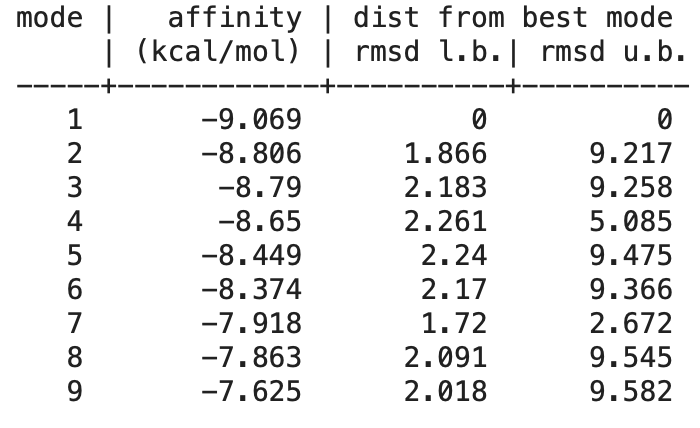

In [ ]:
%cd {local_path}

/content/drive/MyDrive/Colab_Docking/EXP1


5. Once the molecular docking has finished running and you are happy about the results, we will compare the docking poses with the experimentally solved pose for indinavir. In fact, the structure of HIV-2 protease that you downloaded at the beginning of this tutorial was solved with indinavir bound to it.

  The following lines of code are similar to what we did with extracting the 'ATOM' lines of the PDB file, but now we are extracting the lines containing **'MK1'**, the name of the ligand in this PDB file.

In [ ]:
import py3Dmol

def viewdocking(protein_name, ligand_name, exp_name):
  mol_view = py3Dmol.view(width=1000, height=600)

  # Load and style protein
  protein_mol = open(protein_name, 'r').read()
  mol_view.addModel(protein_mol, 'pdb')
  mol_view.setStyle({'cartoon': {'color': 'spectrum'}})

  # Load and style docked ligand
  ligand_mol = open(ligand_name, 'r').read()
  mol_view.addModel(ligand_mol, 'pdb')
  mol_view.setStyle({},{'stick': {'colorscheme': 'greenCarbon'}})

  # Load and style experimental ligand
  exp_ligand_mol = open(exp_name, 'r').read()
  mol_view.addModel(exp_ligand_mol, 'pdb')
  mol_view.setStyle({},{'stick': {'colorscheme': 'greyCarbon'}})

  mol_view.setBackgroundColor('0xffffff')
  mol_view.zoomTo()
  mol_view.show()

In [ ]:
#Here, we will be extracting Indinavir, which is present in the structure of
#HIV-2 protease (yes! this is a simulation with experimental validation!)
#The approach is similar to printing the ATOM and TER lines, but we are using
#the residue name given to the ligand in the experimentally solved structure: MK1
protein = "1QQW/1QQW.pdb" # Corrected path to the PDB file

with open("1QQW/receptor_B_1QQW.pdb","w") as g:
  f = open(protein,'r')
  for line in f:
    row = line.split()
    if "MK1" in row:
      g.write(line)
  g.write("END")

8. The ViewDocking visualizer can then be used as indicated below.

In [ ]:
#View docking results
viewdocking('1QQW/1QQW_prot.pdb','1QQW/5362440_dock1.pdb','1QQW/receptor_B_1QQW.pdb')
#where in green you have the molecule docked by VINA while in gray the experimental pose


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

You can also visualize the results using VMD